## Importing Modules

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Reading The Dataset

In [3]:
df = pd.read_csv(r'C:\Users\tanug\Downloads\UniversityRankings2024.csv')
df.head(5)

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3


## Data Cleaning and Wrangling

In [4]:
# looking at only top 300 schools
df = df[:300]

# Drop the extra column headers
df.drop(labels=[0], axis=0, inplace=True)
df.reset_index(inplace=True) 

score_col = [
    "Academic Reputation Score",
    "Employer Reputation Score",
    "Faculty Student Score",
    "Citations per Faculty Score",
    "International Faculty Score",
    "International Students Score",
    "International Research Network Score",
    "Employment Outcomes Score",
    "Sustainability Score"
]

rank_col = [
    "Academic Reputation Rank",
    "Employer Reputation Rank",
    "Faculty Student Rank",
    "Citations per Faculty Rank",
    "International Faculty Rank",
    "International Students Rank",
    "International Research Network Rank",
    "Employment Outcomes Rank",
    "Sustainability Rank"
]

# Set score values to float
def make_col_float(score_type):
    return df[score_type].astype(float)

for col in score_col:
    df[col] = make_col_float(col)

# Removing non-numeric values
import re
def remove_non_numeric(value):
    return re.sub(r'[^0-9]', '', value)

for col in rank_col:
    df[col] = df[col].apply(remove_non_numeric)
    df[col] = df[col].astype(float)
 
df['Overall SCORE'] = df['Overall SCORE'].apply(remove_non_numeric)
df['Overall SCORE'] = df['Overall SCORE'].astype(float)

df.head()

,index,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,...,56.0,88.2,128.0,94.3,58.0,100.0,4.0,95.2,51.0,1000.0
1,2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,...,64.0,95.8,85.0,99.9,7.0,100.0,6.0,97.3,33.0,992.0
2,3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,...,110.0,98.2,60.0,100.0,1.0,100.0,3.0,97.8,26.0,989.0
3,4,4,5,Harvard University,US,United States,L,FC,VH,5,...,210.0,66.8,223.0,100.0,5.0,100.0,1.0,96.7,39.0,983.0
4,5,5,3,Stanford University,US,United States,L,FC,VH,5,...,78.0,51.2,284.0,95.8,44.0,100.0,2.0,94.4,63.0,981.0


## Explanatory Data Analysis

#### Which countries are in the Top 20 with the Most Top-Ranked Universities?

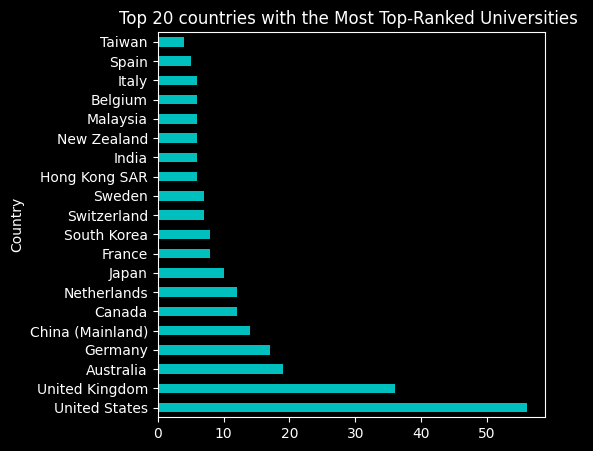

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
plt.title("Top 20 countries with the Most Top-Ranked Universities ")
plt.xlabel("Number of Top-Ranked Universities per Country")
df["Country"].value_counts().head(20).plot(kind="barh",color="c")
plt.show()

#### What are the Top 20 Most Top-Ranked Universities in the world?

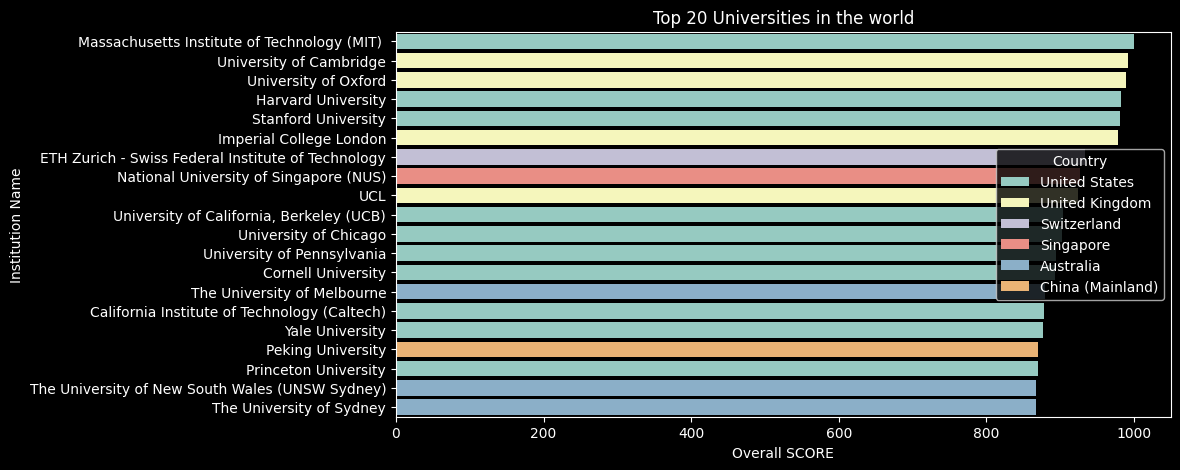

In [18]:
Top_20 = df.head(20)
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.title("Top 20 Universities in the world")
sns.barplot(data=Top_20,x="Overall SCORE",y="Institution Name",hue="Country")
plt.show()

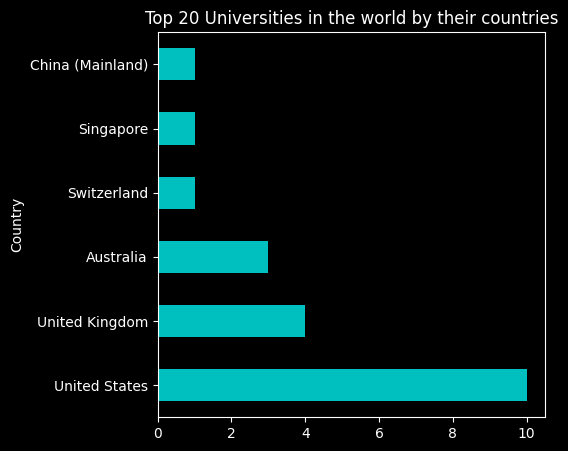

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
plt.title("Top 20 Universities in the world by their countries")
plt.xlabel("Number of Universities")
plt.ylabel("Country")
Top_20["Country"].value_counts().plot(kind="barh",color="c")
plt.show()

#### Comparing south Asian countries with their Top Ranked Universities count.

In [8]:
#countries in south asia
countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran", "Maldives", "Nepal", "Pakistan", "Sri Lanka", "South Korea"]

In [9]:
Sounth_Asian_Uni = df[df["Country"].isin(countries)]
Sounth_Asian_Uni

,index,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
40,41,41,29,Seoul National University,KR,South Korea,L,FC,VH,4,...,701.0,14.5,631.0,36.9,401.0,100.0,8.0,73.8,181.0,785.0
55,56,56,42=,KAIST - Korea Advanced Institute of Science & ...,KR,South Korea,M,CO,VH,4,...,570.0,11.6,682.0,10.6,662.0,41.8,174.0,14.2,621.0,722.0
76,77,=76,73,Yonsei University,KR,South Korea,L,FC,VH,4,...,594.0,49.7,298.0,25.0,498.0,70.9,69.0,38.1,377.0,652.0
78,79,79,74,Korea University,KR,South Korea,L,FC,VH,4,...,694.0,36.3,370.0,19.6,546.0,70.6,71.0,58.6,255.0,647.0
99,100,=100,71,Pohang University of Science And Technology (P...,KR,South Korea,S,FO,VH,3,...,464.0,2.6,701.0,1.3,701.0,13.4,637.0,16.9,581.0,604.0
146,147,=145,99,Sungkyunkwan University(SKKU),KR,South Korea,L,FC,VH,5,...,618.0,34.0,387.0,9.8,672.0,26.8,304.0,27.6,471.0,519.0
148,149,=149,172=,Indian Institute of Technology Bombay (IITB),IN,India,L,CO,VH,4,...,701.0,1.4,701.0,8.5,701.0,47.4,146.0,54.9,277.0,517.0
163,164,=164,157,Hanyang University,KR,South Korea,L,FC,VH,4,...,632.0,54.3,269.0,15.6,587.0,24.8,336.0,77.7,163.0,497.0
196,197,197,174=,Indian Institute of Technology Delhi (IITD),IN,India,M,CO,VH,4,...,701.0,1.4,701.0,6.6,701.0,32.8,234.0,37.5,382.0,461.0
224,225,225,155=,Indian Institute of Science,IN,India,S,SP,NaN,5,...,701.0,1.7,701.0,4.4,701.0,13.8,621.0,10.7,660.0,421.0


In [10]:
Sounth_Asian_Uni["Country"].value_counts()

Country
South Korea    8
India          6
Name: count, dtype: int64

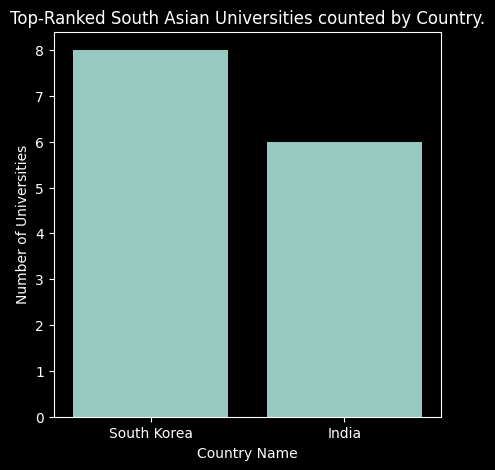

In [11]:
#plotting the number of most top-ranked universities in south asia
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
plt.title("Top-Ranked South Asian Universities counted by Country.")
south_asain_plot = sns.countplot(data=Sounth_Asian_Uni,x="Country")
south_asain_plot.set_xlabel("Country Name",)
south_asain_plot.set_ylabel("Number of Universities")
plt.show()

## Factors Affecting the Ranks

#### Looking at the five dimensions for the purposes of rankings comparison.

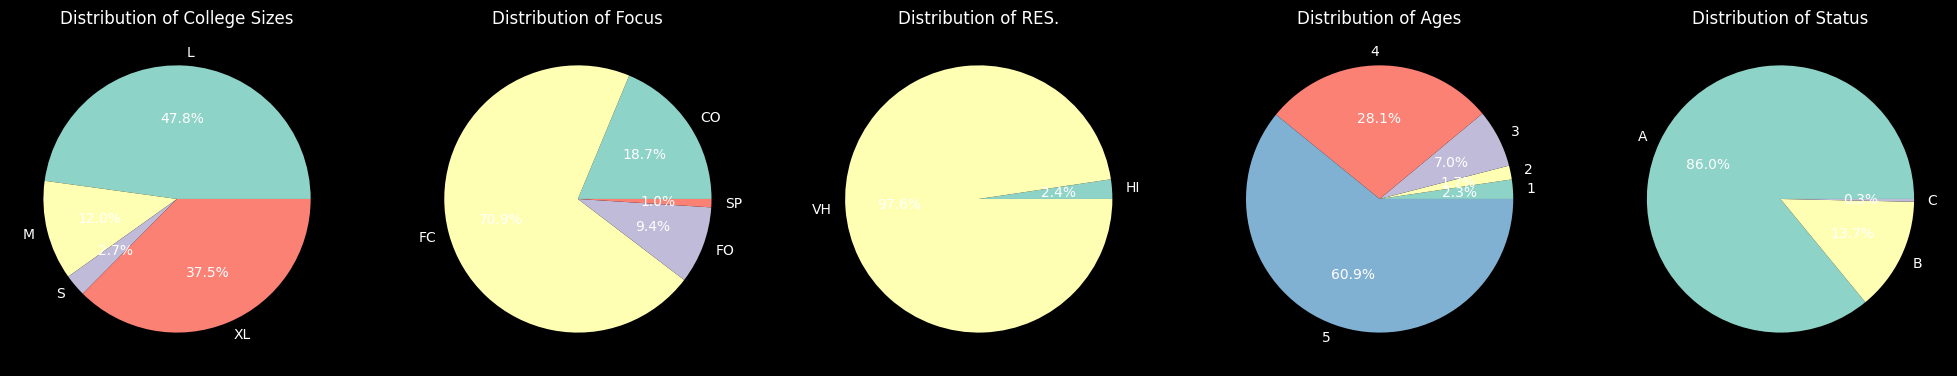

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

# Classifications of Universities, Size, Focus, Res., Age, Status
size = df.groupby(by='SIZE').size() # Get counts 
focus = df.groupby(by='FOCUS').size() 
res = df.groupby(by='RES.').size()
age = df.groupby(by='AGE').size()
status = df.groupby(by='STATUS').size()


size.plot(kind='pie', ax=axes[0], title='Distribution of College Sizes', autopct='%1.1f%%')
focus.plot(kind='pie', ax=axes[1], title='Distribution of Focus', autopct='%1.1f%%')
res.plot(kind='pie', ax=axes[2], title='Distribution of RES.', autopct='%1.1f%%')
age.plot(kind='pie', ax=axes[3], title='Distribution of Ages', autopct='%1.1f%%')
status.plot(kind='pie', ax=axes[4], title='Distribution of Status', autopct='%1.1f%%')
plt.style.use('dark_background')
plt.show()

plt.style.use('dark_background')

del size, focus, res, age, status

#### Distribution of Scores

In [13]:
for col in rank_col:
    print(col)
    ranking = df.sort_values(by=col, ascending=True)
    ranking = ranking[['Institution Name', col]][:10]
    print(ranking)

Academic Reputation Rank
                                Institution Name  Academic Reputation Rank
3                             Harvard University                       1.0
2                           University of Oxford                       2.0
1                        University of Cambridge                       3.0
0   Massachusetts Institute of Technology (MIT)                        4.0
4                            Stanford University                       5.0
9       University of California, Berkeley (UCB)                       6.0
28                       The University of Tokyo                       7.0
29  University of California, Los Angeles (UCLA)                       8.0
15                               Yale University                       9.0
17                          Princeton University                      10.0
Employer Reputation Rank
                                Institution Name  Employer Reputation Rank
3                             Harvard University  

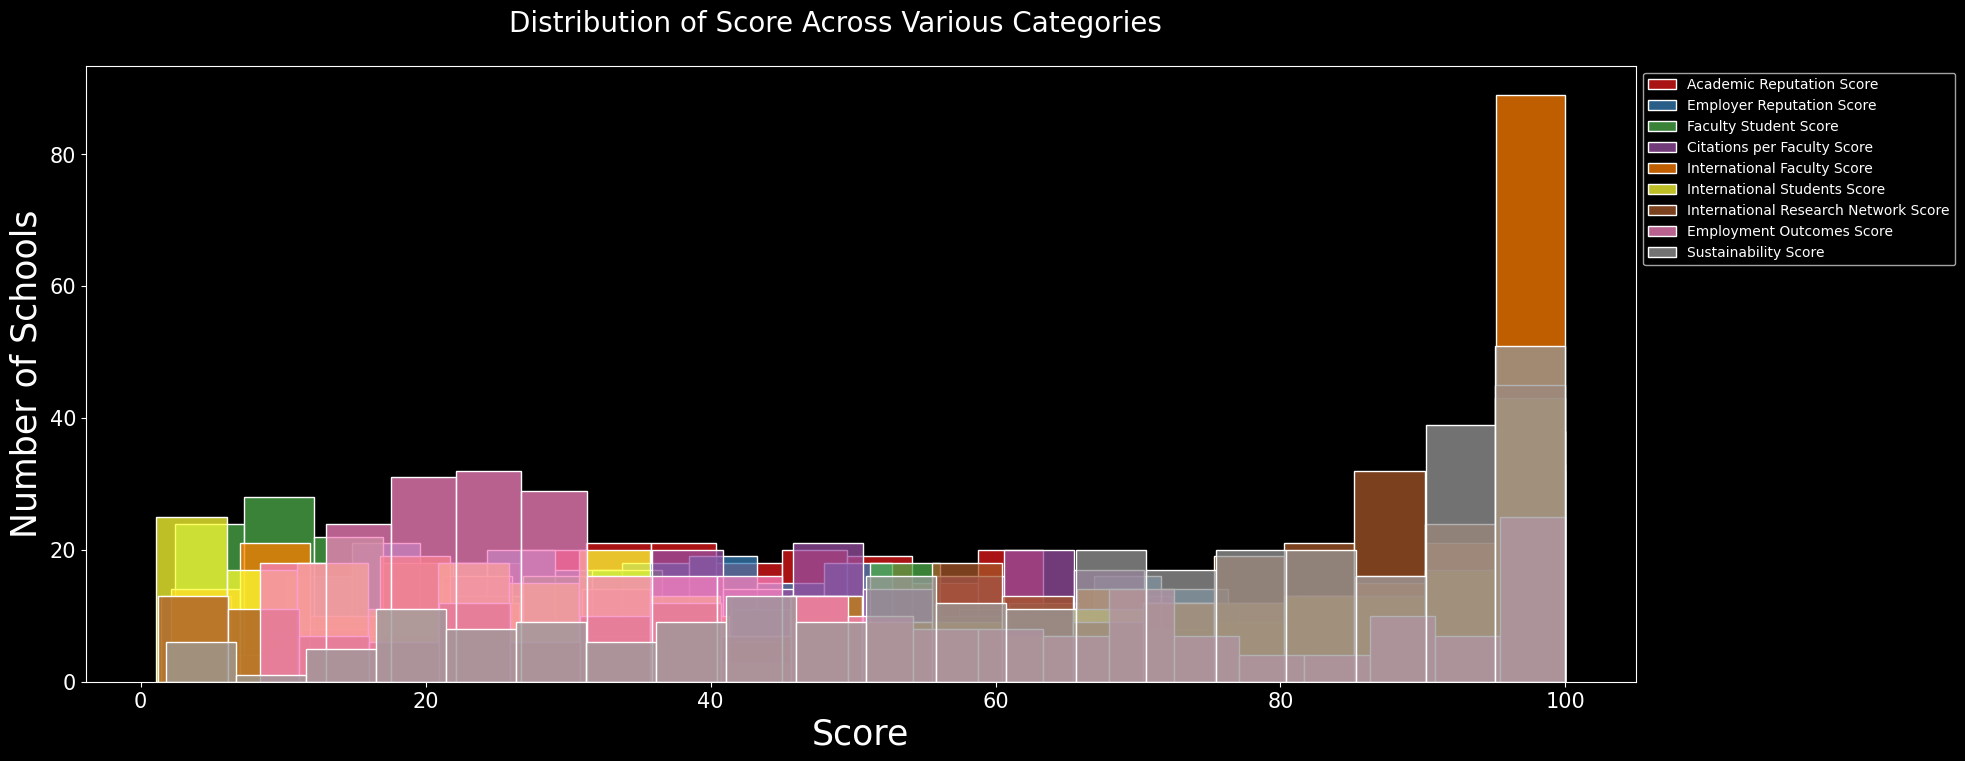

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
for index, col in enumerate(score_col):
    sns.histplot(df[col], label=col, bins=20, kde =False, color = sns.color_palette("Set1")[index],ax=ax, multiple="stack")

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = "Number of Schools", fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel= "Score", fontsize=25)
fig.suptitle('Distribution of Score Across Various Categories', fontsize=20, x = 0.5, y = 0.95)
plt.style.use('dark_background')
plt.show()

#### Distribution of Scores across various categories

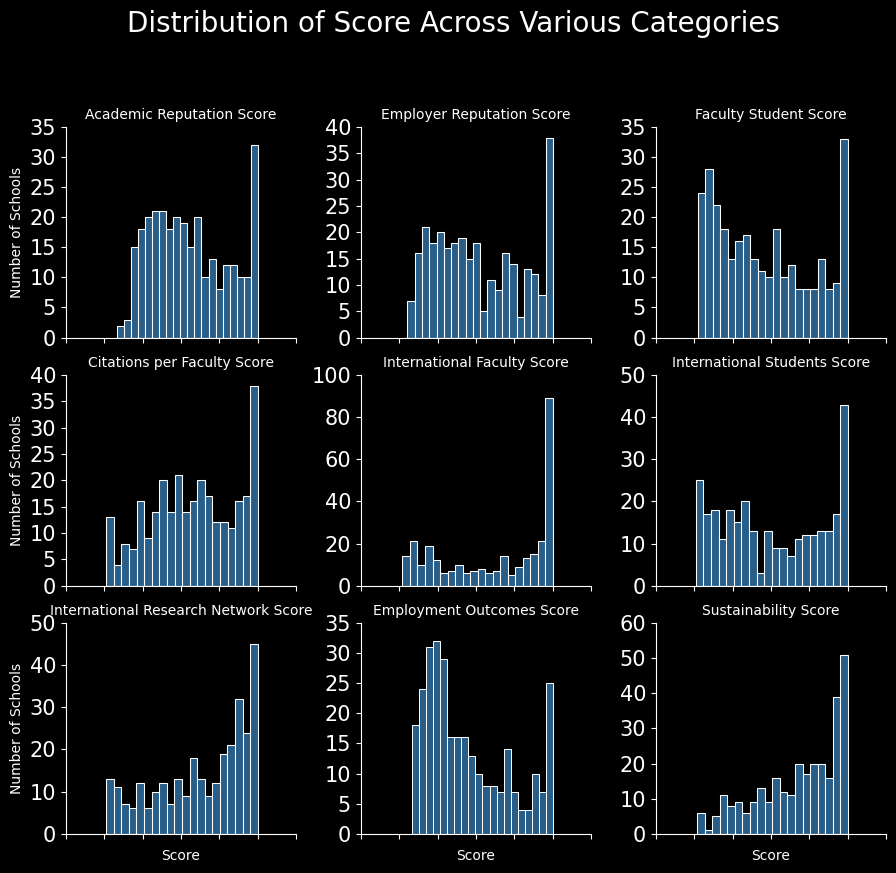

In [15]:
# Create a FacetGrid for multiple histograms side by side
g = sns.FacetGrid(df[score_col].melt(), col="variable", col_wrap=3, sharey=False, height=3)
g.map(sns.histplot, "value", bins=20, kde=False, color=sns.color_palette("Set1")[1])

# Customize plot appearance
g.set_axis_labels("Score", "Number of Schools")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)

# Add a common title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Score Across Various Categories', fontsize=20)

# Show the plot
plt.style.use('dark_background')
plt.show()

#### Radar Chart to see the performance of a particular school in various categories

In [16]:
import plotly.express as px

def school_scores(institution_name) -> pd.DataFrame :
    institution_scores = df[df['Institution Name'] == institution_name][score_col].transpose()
    institution_scores.reset_index(inplace=True)
    institution_scores.columns = ['Score Type', 'Score']
    institution_scores['Score'] = institution_scores['Score'].astype(float)
    # print(institution_scores)
    return institution_scores


harvard = school_scores('Harvard University')
fig = px.line_polar(tsinghua, r='Score', theta='Score Type', title='Radar Chart For Harvard University',template="plotly_dark", line_close=True)
fig.show()

NameError: name 'tsinghua' is not defined

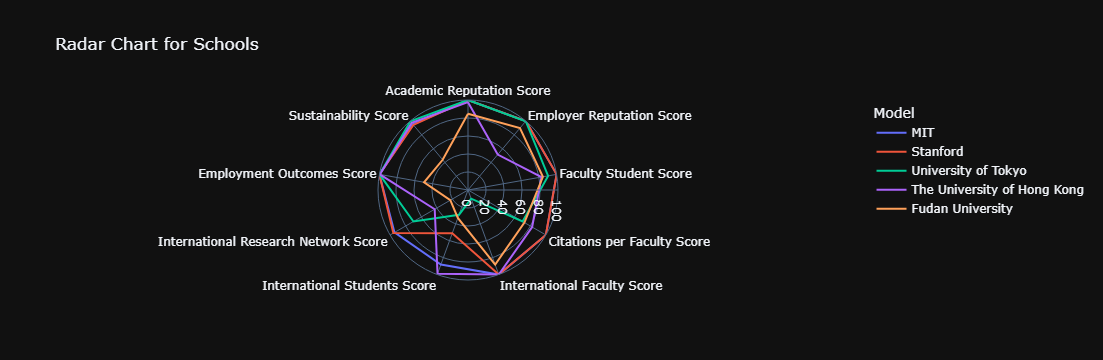

In [ ]:
mit = school_scores('Massachusetts Institute of Technology (MIT) ') # Rank 1
stanford = school_scores('Stanford University') # Rank 5
uni_of_tokyo = school_scores('The University of Tokyo') # Rank 28
uni_of_hk = school_scores('The University of Hong Kong') # Rank 26
fudan = school_scores('Fudan University') # Rank 50

mit['Model'] = 'MIT'
stanford['Model'] = 'Stanford'
uni_of_tokyo['Model'] = 'University of Tokyo'
uni_of_hk['Model'] = 'The University of Hong Kong'
fudan['Model'] = 'Fudan University'

all_uni = pd.concat([mit, stanford, uni_of_tokyo, uni_of_hk, fudan], axis=0)

fig = px.line_polar(all_uni, r='Score', theta='Score Type', color='Model', 
                    title='Radar Chart for Schools',  
                    template="plotly_dark", line_close=True)
fig.show()

## Data Analysis

#### Pie chart for relative weights of categories

Academic Reputation Score: 30.01%
Employer Reputation Score: 14.98%
Faculty Student Score: 10.00%
Citations per Faculty Score: 20.00%
International Faculty Score: 5.00%
International Students Score: 5.01%
International Research Network Score: 5.00%
Employment Outcomes Score: 5.00%
Sustainability Score: 5.00%


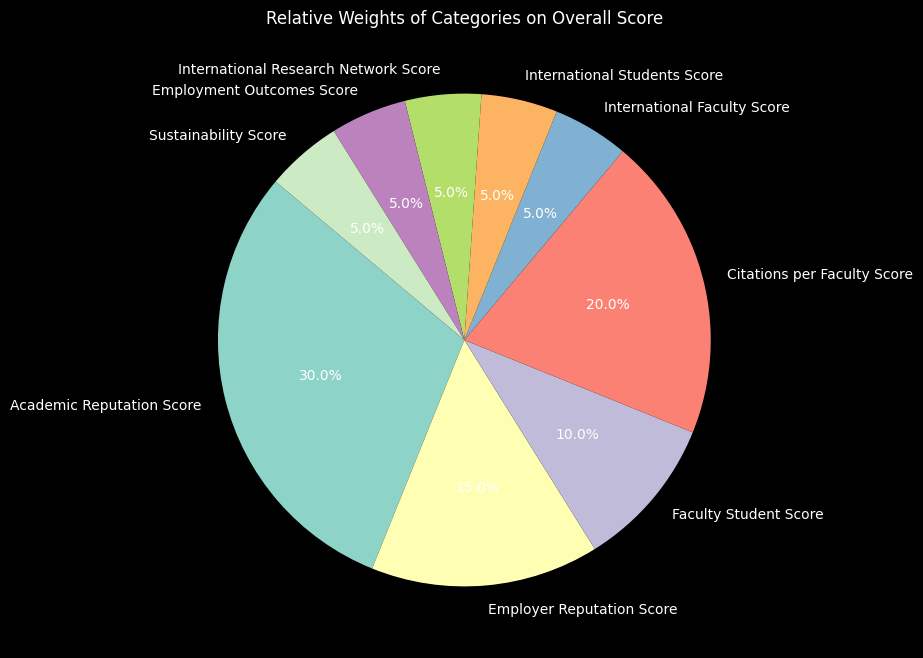

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[score_col]
y = df['Overall SCORE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)
category_weights = model.coef_ 

# Normalize the weights to sum up to 1 (for relative weights)
sum_weights = sum(category_weights)
relative_weights = category_weights / sum_weights

# Print the relative weights of each category
for i, category in enumerate(score_col):
    print(f"{category}: {relative_weights[i]:.2%}")
    

plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('white')
plt.pie(relative_weights, labels=score_col, autopct='%.1f%%', startangle=140)
plt.title('Relative Weights of Categories on Overall Score')
plt.show()

#### Heatmap to visualize the correlations

Academic Reputation Score               0.862012
Employer Reputation Score               0.699860
Faculty Student Score                   0.392729
Citations per Faculty Score             0.441857
International Faculty Score             0.256317
International Students Score            0.411986
International Research Network Score    0.371779
Employment Outcomes Score               0.604636
Sustainability Score                    0.383236
Overall SCORE                           1.000000
Name: Overall SCORE, dtype: float64


<Axes: >

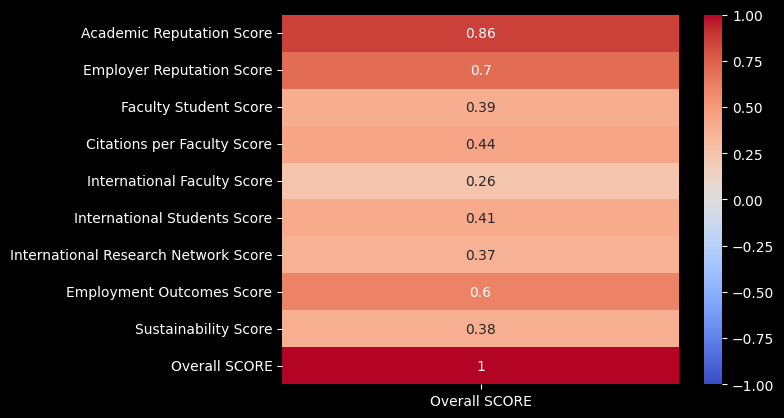

In [ ]:
pearson_corr = df[(score_col + ['Overall SCORE'])].corr()['Overall SCORE']
print(pearson_corr)

sns.heatmap(pearson_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)